In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("primary_data.csv")

In [3]:
df_original = df.copy()

In [4]:
def remove_outliers(data, bairro, coluna):
    print(bairro)
    q1, q3 = data.loc[data["bairro"] == bairro, coluna].quantile([.25,.75])
    iqr = q3-q1
    lb = max(q1 - 1.5*iqr, 0)
    ub = q3 + 1.5*iqr
    print(f"Lower bound: {lb}, upper bound: {ub}")
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
    len_after = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    print(f"Removidos {(1-(len_after/len_before))*100}% dos dados")
    return data

In [5]:
# Tentem fazer uma que limpe por percentil
#def remove_outliers_percentis(data, bairro, coluna, percentil=.99):
#    print(bairro)
#    print(f"Lower bound: {lb}, upper bound: {ub}")
#    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
#    data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
#    len_after = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
#    print(f"Removidos {(1-(len_after/len_before))*100}% dos dados")
#    return data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

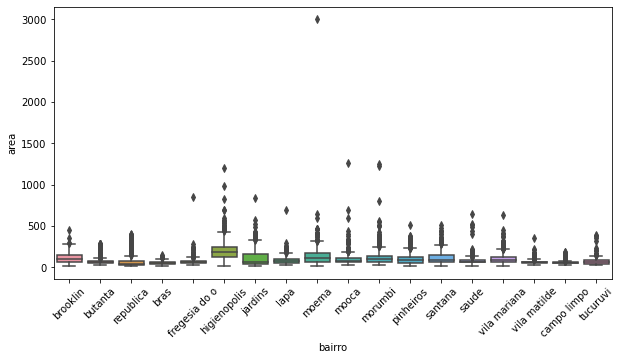

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation=45)

In [7]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "area")

brooklin
Lower bound: 0, upper bound: 286.5
Removidos 0.487210718635811% dos dados
butanta
Lower bound: 11.5, upper bound: 111.5
Removidos 7.015457788347201% dos dados
republica
Lower bound: 0, upper bound: 140.0
Removidos 7.78032036613272% dos dados
bras
Lower bound: 5.0, upper bound: 109.0
Removidos 5.882352941176472% dos dados
fregesia do o
Lower bound: 6.5, upper bound: 122.5
Removidos 6.349206349206349% dos dados
higienopolis
Lower bound: 0, upper bound: 432.75
Removidos 3.4482758620689613% dos dados
jardins
Lower bound: 0, upper bound: 334.0
Removidos 4.968152866242037% dos dados
lapa
Lower bound: 0, upper bound: 176.75
Removidos 2.83870967741936% dos dados
moema
Lower bound: 0, upper bound: 323.0
Removidos 2.734375% dos dados
mooca
Lower bound: 0, upper bound: 190.0
Removidos 4.9267643142476665% dos dados
morumbi
Lower bound: 0, upper bound: 250.0
Removidos 4.504504504504503% dos dados
pinheiros
Lower bound: 0, upper bound: 229.5
Removidos 3.4606205250596656% dos dados
santana
L

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

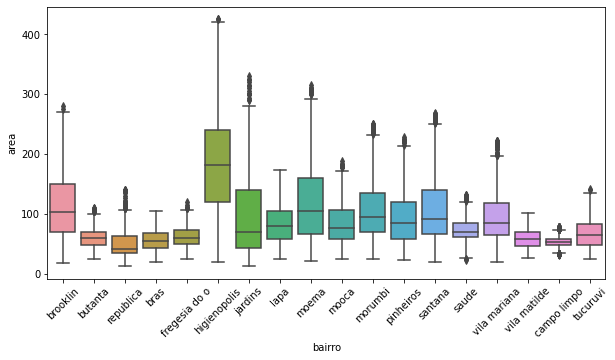

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation=45)

In [9]:
df.columns[:15]

Index(['id', 'url', 'header', 'address', 'area', 'rooms', 'bathrooms',
       'garages', 'price', 'condo', 'bairro', 'crawled_at', 'Academia',
       'Aceita animais', 'Acesso para deficientes'],
      dtype='object')

In [10]:
df["rooms"].value_counts(normalize=True)

2     0.398728
3     0.361497
1     0.153448
4     0.082001
5     0.002687
6     0.000524
16    0.000393
20    0.000328
18    0.000131
15    0.000066
14    0.000066
17    0.000066
8     0.000066
Name: rooms, dtype: float64

In [11]:
df.loc[df["rooms"]>6, "rooms"] = np.nan

In [12]:
df["bathrooms"].value_counts(normalize=True)[:8].sum()

0.9990823282642894

In [13]:
df.loc[df["bathrooms"]==8].iloc[2]["url"]

'https://www.vivareal.com.br/imovel/apartamento-4-quartos-jardins-zona-oeste-sao-paulo-com-garagem-387m2-venda-RS7600000-id-2521273097/'

In [14]:
df.loc[df["bathrooms"]>8, "bathrooms"] = np.nan

In [15]:
df["garages"].value_counts(normalize=True)[:7]

1    0.483613
2    0.261012
0    0.132341
3    0.075052
4    0.035199
5    0.007669
6    0.002950
Name: garages, dtype: float64

In [16]:
df.loc[df["garages"]>6, "garages"] = np.nan

In [17]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "price")

brooklin
Lower bound: 0, upper bound: 3425600.0
Removidos 2.679658952496955% dos dados
butanta
Lower bound: 0, upper bound: 935000.0
Removidos 5.945303210463737% dos dados
republica
Lower bound: 0, upper bound: 1015000.0
Removidos 10.755148741418763% dos dados
bras
Lower bound: 0, upper bound: 920250.0
Removidos 0.5767012687427964% dos dados
fregesia do o
Lower bound: 0, upper bound: 875000.0
Removidos 6.4625850340136015% dos dados
higienopolis
Lower bound: 0, upper bound: 4706875.0
Removidos 8.251231527093594% dos dados
jardins
Lower bound: 0, upper bound: 5065000.0
Removidos 8.662420382165603% dos dados
lapa
Lower bound: 0, upper bound: 1930000.0
Removidos 2.580645161290318% dos dados
moema
Lower bound: 0, upper bound: 4778250.0
Removidos 6.5104166666666625% dos dados
mooca
Lower bound: 0, upper bound: 1620075.0
Removidos 4.9267643142476665% dos dados
morumbi
Lower bound: 0, upper bound: 1596975.0
Removidos 6.3063063063063085% dos dados
pinheiros
Lower bound: 0, upper bound: 3279687.

In [18]:
df.loc[df["condo"]<100, "condo"] = np.nan

In [19]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "condo")

brooklin
Lower bound: 0, upper bound: 2777.0
Removidos 3.271692745376953% dos dados
butanta
Lower bound: 0, upper bound: 1305.0
Removidos 3.0855539971949564% dos dados
republica
Lower bound: 0, upper bound: 1088.0
Removidos 9.647979139504558% dos dados
bras
Lower bound: 0, upper bound: 890.5
Removidos 2.2292993630573243% dos dados
fregesia do o
Lower bound: 42.0, upper bound: 1050.0
Removidos 7.742782152230976% dos dados
higienopolis
Lower bound: 0, upper bound: 6150.0
Removidos 5.289672544080604% dos dados
jardins
Lower bound: 0, upper bound: 4267.25
Removidos 6.921944035346095% dos dados
lapa
Lower bound: 0, upper bound: 1573.0
Removidos 5.666666666666664% dos dados
moema
Lower bound: 0, upper bound: 4000.0
Removidos 6.113537117903933% dos dados
mooca
Lower bound: 0, upper bound: 1479.375
Removidos 5.757575757575761% dos dados
morumbi
Lower bound: 0, upper bound: 2730.0
Removidos 5.840286054827171% dos dados
pinheiros
Lower bound: 0, upper bound: 2585.25
Removidos 6.151419558359617% 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

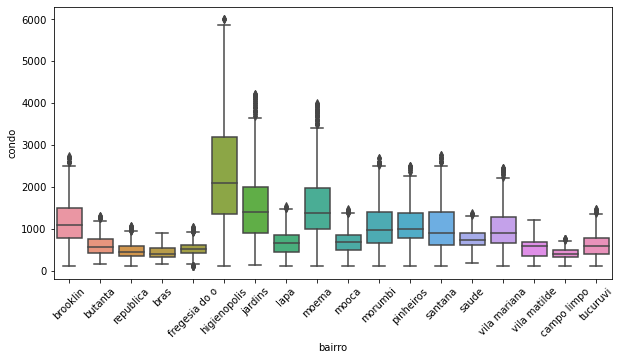

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "condo"]], y="condo", x="bairro")
plt.xticks(rotation=45)

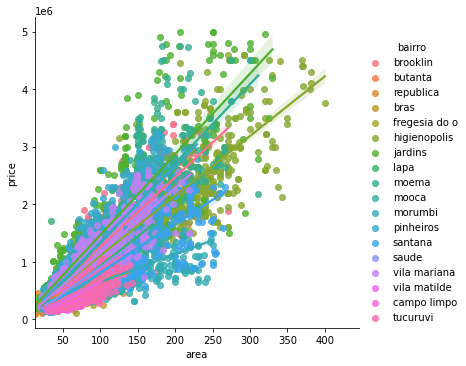

In [21]:
sns.lmplot(data=df, x="area", y="price", hue="bairro")

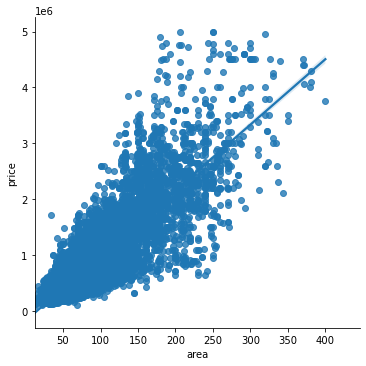

In [22]:
sns.lmplot(data=df, x="area", y="price")

In [23]:
df.isnull().sum()[:15]

id                            0
url                           0
header                        0
address                       0
area                        710
rooms                        17
bathrooms                    13
garages                      33
price                       861
condo                      3002
bairro                        0
crawled_at                    0
Academia                      0
Aceita animais                0
Acesso para deficientes       0
dtype: int64